In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import datetime as dt 
from datetime import datetime, timedelta
import warnings
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
sns.set()

In [2]:
Full_data=pd.read_csv("cleaned_Procedure_66982_data.csv")
# Determine the split point
split_point = len(Full_data) // 2

# Split the dataset
data_first_half = Full_data.iloc[:split_point]
data_second_half = Full_data.iloc[split_point:]

# Use the first half
print(data_first_half)

data_first_half.to_csv('first_half_dataset.csv', index=False)

      ï»¿Rndrng_NPI                   Rndrng_Prvdr_Last_Org_Name  \
0        1003013533                                       Cioffi   
1        1003017468                                        Smith   
2        1003019092                                    Hawthorne   
3        1003034034                                       Gordon   
4        1003034927                                       Bhatia   
...             ...                                          ...   
2486     1487821633  Pacific Cataract And Laser Institute Inc Pc   
2487     1487840047                                       Khator   
2488     1487840740               Orange City Surgery Center Llc   
2489     1487851754                                       Dickes   
2490     1487857322      Pain Management Centers Of America, Llc   

     Rndrng_Prvdr_First_Name Rndrng_Prvdr_MI Rndrng_Prvdr_Crdntls  \
0                     George               A                   MD   
1                       Ryan               T 

In [3]:
df1=pd.read_csv('first_half_dataset.csv')
Procedure_eighty_data_train, Procedure_twenty_data_test = train_test_split(df1, 
                                                         random_state=104, 
                                                         test_size=0.20, 
                                                         shuffle=True)
Procedure_eighty_data_train.to_csv('first_half_dataset_80_data.csv',index=False)
Procedure_twenty_data_test.to_csv('first_half_dataset_20_data.csv',index=False)

In [4]:
csv_file_path = 'first_half_dataset_80_data.csv'
columns_to_convert = ['Avg_Sbmtd_Chrg', 'Avg_Mdcr_Alowd_Amt', 'Avg_Mdcr_Stdzd_Amt']

data = pd.read_csv(csv_file_path)

# Convert currency formatted columns to floats
for column in columns_to_convert:
    data[column] = data[column].replace('[\$,]', '', regex=True).astype(float)

# Select and rename the columns you need
data_for_var = data[['Tot_Benes', 'Tot_Srvcs', 'Avg_Mdcr_Stdzd_Amt']].rename(columns={
    'Tot_Benes': 'Tot_Benes',
    'Tot_Srvcs': 'Tot_Srvcs',
    'Avg_Mdcr_Stdzd_Amt': 'Avg_Mdcr_Stdzd_Amt'
})

# Ensure all data is in numeric form and drop any rows with NaN values
data_for_var = data_for_var.apply(pd.to_numeric, errors='coerce').dropna()

print(data_for_var.head())
print(data_for_var.dtypes)

   Tot_Benes  Tot_Srvcs  Avg_Mdcr_Stdzd_Amt
0         52       66.0              769.32
1         76       89.0              809.39
2         14       16.0              814.81
3         44       63.0              582.31
4         12       16.0              501.51
Tot_Benes               int64
Tot_Srvcs             float64
Avg_Mdcr_Stdzd_Amt    float64
dtype: object


In [5]:
data_for_var['Tot_Benes_standard_normal_variate'] = (data_for_var['Tot_Benes'] - data_for_var['Tot_Benes'].mean()) / data_for_var['Tot_Benes'].std()
data_for_var['Tot_Srvcs_standard_normal_variate'] = (data_for_var['Tot_Srvcs'] - data_for_var['Tot_Srvcs'].mean()) / data_for_var['Tot_Srvcs'].std()
data_for_var['Avg_Mdcr_Stdzd_Amt_standard_normal_variate'] = (data_for_var['Avg_Mdcr_Stdzd_Amt'] - data_for_var['Avg_Mdcr_Stdzd_Amt'].mean()) / data_for_var['Avg_Mdcr_Stdzd_Amt'].std()

data_for_var.head()

,Tot_Benes,Tot_Srvcs,Avg_Mdcr_Stdzd_Amt,Tot_Benes_standard_normal_variate,Tot_Srvcs_standard_normal_variate,Avg_Mdcr_Stdzd_Amt_standard_normal_variate
0,52,66.0,769.32,0.551459,0.373508,1.168963
1,76,89.0,809.39,1.246768,0.796632,1.444472
2,14,16.0,814.81,-0.549447,-0.546328,1.481738
3,44,63.0,582.31,0.319689,0.318318,-0.116860
4,12,16.0,501.51,-0.607390,-0.546328,-0.672416


In [6]:
data_for_var.to_csv('Fisrt_half_original_data.csv', index=False)

Centroids:
[[ 0.22164779  0.10324272  1.24359559]
 [-0.31700362 -0.27020851 -0.44897236]
 [ 3.03844948  2.92745147  0.64124331]]
Cluster 0 has 453 points.
Cluster 1 has 1419 points.
Cluster 2 has 115 points.


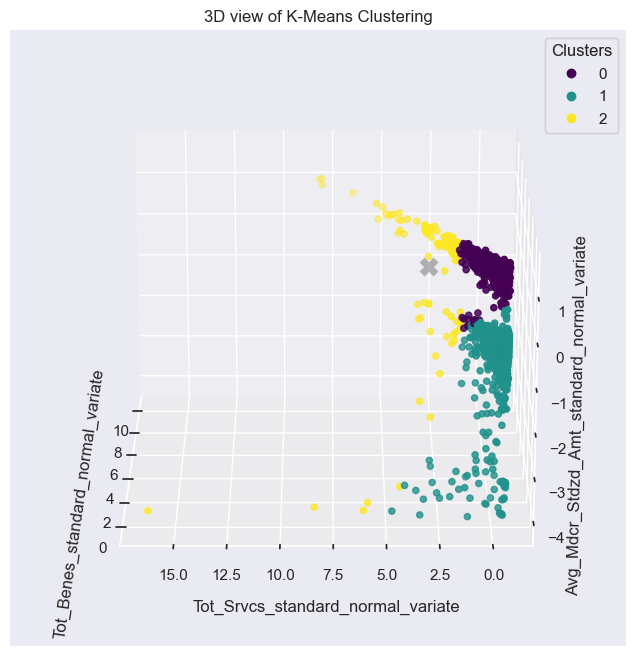

In [8]:
X = data_for_var[['Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']].values

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

data_for_var['Cluster_Label'] = kmeans.labels_
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("Centroids:")
print(centroids)

for i in range(3):
    print(f"Cluster {i} has {sum(labels == i)} points.")

# Setting up the 3D plot with a specified figure size
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=20, azim=180)

# Using a color map for clusters
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', marker='o')

# Adding centroids to the plot
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', color='k', s=100, linewidths=5, zorder=10)

# Adding a color bar as a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Adjusting the labels to be more visible by moving them closer to the ticks
ax.set_xlabel('Tot_Benes_standard_normal_variate', labelpad=10)
ax.set_ylabel('Tot_Srvcs_standard_normal_variate', labelpad=10)
ax.set_zlabel('Avg_Mdcr_Stdzd_Amt_standard_normal_variate', labelpad=0)

plt.title('3D view of K-Means Clustering')
plt.show()

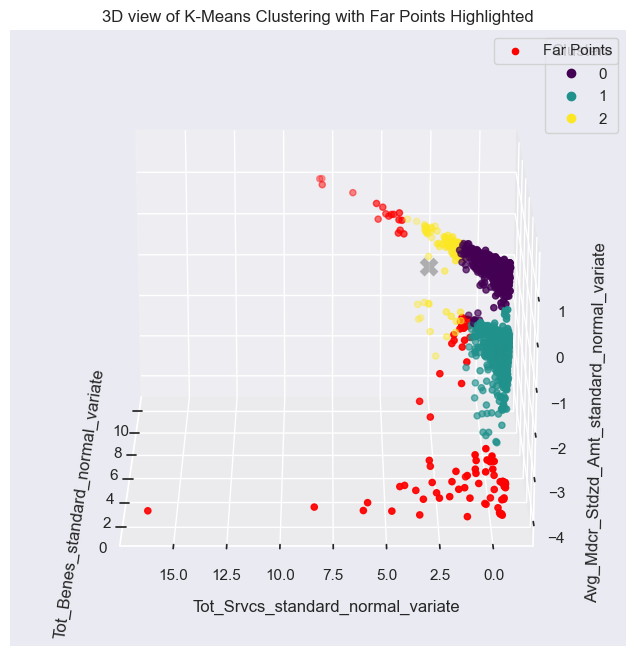

In [9]:
X = data_for_var[['Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']].values

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

data_for_var['Cluster_Label'] = kmeans.labels_
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Calculate the distance of each point to its centroid
distances = np.sqrt(((X - centroids[labels]) ** 2).sum(axis=1))

# Determine a threshold to identify points far from centroids
# For example, set the threshold as the 95th percentile of the distances
threshold = np.percentile(distances, 95)

# Identify points that are far from their centroids
far_points = distances > threshold

# Setting up the 3D plot with a specified figure size
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=20, azim=180)

# Plotting regular points
ax.scatter(X[~far_points, 0], X[~far_points, 1], X[~far_points, 2], c=labels[~far_points], cmap='viridis', marker='o')

# Highlighting points that are far from centroids
ax.scatter(X[far_points, 0], X[far_points, 1], X[far_points, 2], c='red', marker='o', label='Far Points')

# Adding centroids to the plot
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', color='k', s=100, linewidths=5, zorder=10)

# Adding a legendA
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.legend()

ax.set_xlabel('Tot_Benes_standard_normal_variate', labelpad=10)
ax.set_ylabel('Tot_Srvcs_standard_normal_variate', labelpad=10)
ax.set_zlabel('Avg_Mdcr_Stdzd_Amt_standard_normal_variate', labelpad=10)

plt.title('3D view of K-Means Clustering with Far Points Highlighted')
plt.show()

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Assuming data_for_var and other variables are already defined as per your previous code

# Add a column to indicate if a point is an outlier
data_for_var['Far_Point'] = far_points

# Initialize the outlier columns with NaN or some placeholder value
data_for_var['Outlier_Tot_Benes'] = np.nan
data_for_var['Outlier_Tot_Srvcs'] = np.nan
data_for_var['Outlier_Avg_Mdcr_Stdzd_Amt'] = np.nan

# Populate the outlier columns
for i, row in data_for_var.iterrows():
    if row['Far_Point']:
        data_for_var.at[i, 'Outlier_Tot_Benes'] = row['Tot_Benes_standard_normal_variate']
        data_for_var.at[i, 'Outlier_Tot_Srvcs'] = row['Tot_Srvcs_standard_normal_variate']
        data_for_var.at[i, 'Outlier_Avg_Mdcr_Stdzd_Amt'] = row['Avg_Mdcr_Stdzd_Amt_standard_normal_variate']

# Now the CSV will have separate columns showing the outliers for each feature
data_for_var.to_csv('Kmeans_First_half_data.csv', index=False)

In [12]:
data_for_var['Far_Point'] = far_points
print(data_for_var.head())

   Tot_Benes  Tot_Srvcs  Avg_Mdcr_Stdzd_Amt  \
0         52       66.0              769.32   
1         76       89.0              809.39   
2         14       16.0              814.81   
3         44       63.0              582.31   
4         12       16.0              501.51   

   Tot_Benes_standard_normal_variate  Tot_Srvcs_standard_normal_variate  \
0                           0.551459                           0.373508   
1                           1.246768                           0.796632   
2                          -0.549447                          -0.546328   
3                           0.319689                           0.318318   
4                          -0.607390                          -0.546328   

   Avg_Mdcr_Stdzd_Amt_standard_normal_variate  Cluster_Label  Far_Point  \
0                                    1.168963              0      False   
1                                    1.444472              0      False   
2                                    1.48

In [13]:
data_for_var.to_csv('Kmeans_First_half_data.csv',index=False)

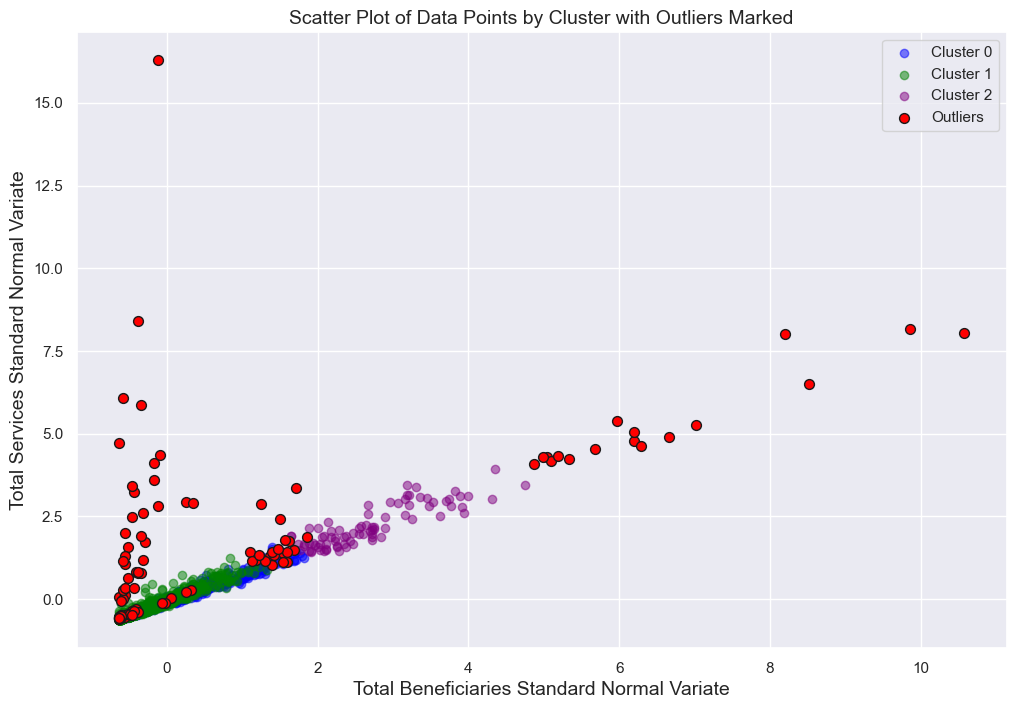

   Tot_Benes  Tot_Srvcs  Avg_Mdcr_Stdzd_Amt  \
0         52       66.0              769.32   
1         76       89.0              809.39   
2         14       16.0              814.81   
3         44       63.0              582.31   
4         12       16.0              501.51   

   Tot_Benes_standard_normal_variate  Tot_Srvcs_standard_normal_variate  \
0                           0.551459                           0.373508   
1                           1.246768                           0.796632   
2                          -0.549447                          -0.546328   
3                           0.319689                           0.318318   
4                          -0.607390                          -0.546328   

   Avg_Mdcr_Stdzd_Amt_standard_normal_variate  Cluster_Label  Far_Point  \
0                                    1.168963              0      False   
1                                    1.444472              0      False   
2                                    1.48

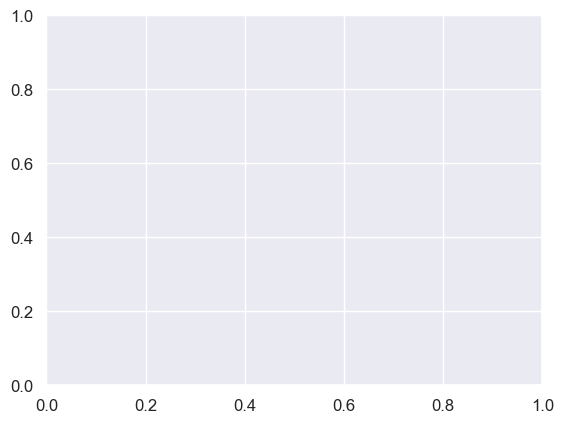

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Assuming 'data_for_var' is your DataFrame and has been loaded correctly with the necessary columns
X = data_for_var[['Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']].values

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

data_for_var['Cluster_Label'] = kmeans.labels_
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Calculate the distance of each point to its centroid
distances = np.sqrt(((X - centroids[labels]) ** 2).sum(axis=1))
data_for_var['Distance_to_Centroid'] = distances

# Determine a threshold to identify points far from centroids
threshold = np.percentile(distances, 95)
data_for_var['Is_Outlier'] = distances > threshold

plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'purple']

# Plot clusters
for cluster in range(3):
    cluster_data = data_for_var[data_for_var['Cluster_Label'] == cluster]
    plt.scatter(cluster_data['Tot_Benes_standard_normal_variate'], cluster_data['Tot_Srvcs_standard_normal_variate'], color=colors[cluster], label=f'Cluster {cluster}', alpha=0.5)

# Plot outliers
outliers = data_for_var[data_for_var['Is_Outlier']]
plt.scatter(outliers['Tot_Benes_standard_normal_variate'], outliers['Tot_Srvcs_standard_normal_variate'], color='red', label='Outliers', edgecolor='k', s=50)

plt.title('Scatter Plot of Data Points by Cluster with Outliers Marked',fontsize=14)
plt.xlabel('Total Beneficiaries Standard Normal Variate',fontsize=14)
plt.ylabel('Total Services Standard Normal Variate',fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

plt.tick_params(axis='both', which='major', labelsize=12)

# Display the first few rows of the DataFrame
print(data_for_var.head())

# Save the DataFrame to a CSV file
data_for_var.to_csv('First_half_data_outliers.csv', index=False)
